## Examining variation of clustering results

Using approaches outlined in the [Comparing clustering notebook](Comparing_clustering.ipynb) and others in this series, the amount of variation, or lack thereof, from clustering algorithms can easily be explored.

First as a basis for following up on the previous notebooks, we can demonstrate that with the same data, and the same settings, that established algorithms used in these series of notebooks result in the same clustering results, no matter how many times you re-run the clustering. And that is good from a **REPRODUCIBILITY standpoint** since I didn't encounter so far any way to set something like a 'seed' the way you can do with Python's random number generators.

### Cycling on same data

This will generate clusters based on approach used in [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb) notebook.

In [1]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df_a = pd.DataFrame(np.array(variables).transpose())

In [2]:
df_a.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.185474,0.469610,-0.589600,0.077860,-0.248056,-0.886296,-0.058887,0.803308,-1.921386,1.175927,...,0.420382,1.413045,-3.584977,0.363752,-0.972806,-1.177643,0.787146,1.145450,1.259895,-0.057837
1,0.384736,0.232052,-0.087743,-1.031045,1.175538,-0.288578,0.216320,-1.783491,-1.241807,0.720577,...,-0.859057,0.973215,-2.688016,0.708682,-1.194932,-0.092643,1.611984,-0.548672,-1.096657,-2.130609
2,1.371116,-1.782632,-0.282374,-0.795341,-2.019229,-1.929329,-3.422671,0.615170,-1.777101,1.076152,...,1.900208,0.193935,2.030096,-2.273449,0.831393,2.250024,-0.439911,0.049776,-2.773351,1.713170
3,0.367261,2.136528,1.821816,1.198642,0.152686,1.039862,2.437649,0.607199,1.573191,2.283211,...,0.643947,-1.081522,-1.933949,1.811246,-0.262844,-0.704878,2.192340,-1.139815,0.722883,-3.782208
4,1.169663,-0.563569,-1.581806,-0.454832,-1.147351,0.320269,1.057430,0.340348,-0.844533,0.588299,...,1.146030,1.131273,-1.353600,-1.074691,-2.283518,1.376388,-0.845271,0.145538,0.946627,-2.996937


With some artifical generated clusters in hand, using the code shown just below. now we could run repeatedly a series of a sinlge-pass clusterings by Hierarchical clustering, as was performed in [Hierarchical_clustering.ipynb](Hierarchical_clustering.ipynb) notebook, and collect as data the list of the cluster assignments corresponding to the labels data for comparison. (Just using single because the overal cluster assignments are what is of interest, not how those specific clusters are ordered internally. Since the order within the cluster is the only thing that changes, we don't need to go through that step as well.) However, I'm going to suggest you bother running that code as it takes on the order of a few minutes to repeat it 350. I've done it 1000 of times now and for Hierarchical clustering and DBSCAN as performed in this series of notebooks, as long as you don't change settings, the results always come out the same.

```python
list_of_assignments_ordered_on_labels = [] 
number_of_times_to_run_clustering = 350

def hc(df):
    '''
    Run single-pass clustering has based on code previously presented in 
    depth in Hierarchical_clustering.ipynb.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    import scipy
    import scipy.cluster.hierarchy as sch

    X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated
    '''
    print("number of clusters determined:",len(unique))
    for x in np.unique(ind):
        class_members = [xc for xc in ind if xc == x]
        print(f"{len(class_members)} variables in cluster {x}")
    '''
    return ind
for i in range(number_of_times_to_run_clustering):
    list_of_assignments_ordered_on_labels.append(hc(df_a))

# A plot to compare all the runs to each other
from sklearn.metrics.cluster import adjusted_rand_score
a = list_of_assignments_ordered_on_labels.copy()
result = np.array([[adjusted_rand_score(i, j)for j in a ]for i in a])
# represent result as a heatmap with just lower triangle showing
# just the lower triangle showing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mask_ut=np.triu(np.ones(result.shape)).astype(np.bool) # based on https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
size = 6
fig, ax = plt.subplots(figsize=(size+2, size))
sns.heatmap(result,mask=mask_ut, cmap="RdYlGn");
```

That can be used to establish algorithms used in these series of notebooks result in the same clustering results, no matter how many times you re-run the clustering. And that is good from a **REPRODUCIBILITY standpoint** since, as I mentioned in the opening section of this notebook, I didn't encounter so far any way to set something like a 'seed' the way you can do with Python's random number generators.

### Comparing the results for two different algorithmns for many examples of generated 'data'

One of the things that is hard to grasp for novices, is that you still need to become familiar with and consider the data before running the the clustering algorithmns. You can get dramatically different outcomes for different algorithmns even on the same data. In particular, the settings used can alter the outcomes dramtically.

This section aims to illustrate that by repeatedly generating 'mock data' and examining that same data with different algorithmns. In this example, hierarchical clustering and DBSCAN will be used. The mock data will be generated with specifically three clusters and to further drive home how different algoithmns and settings have to be considered, we'll tell hierarchical clustering to specifically limit the clusters to three. (Note that the line concerning the latent data is different than earlier but similar code in this series. Here it reads `+ (latent[belongs_to_cluster[i], :]) * 0.2805)`.)

This first cell just sets up the necessary code blocks.

In [3]:
list_of_hc_assignments_ordered_on_labels = []
list_of_db_assignments_ordered_on_labels = []


import pandas as pd
import numpy as np
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics
def generate_clusters_df():
    '''
    Return a dataframe with the clusters
    '''
    # Generate 50 variables with 1000 samples
    n_variables = 50
    n_samples = 1000

    # Those variables will be spread over 3 clusters of variable sizes
    cluster_size = [5,22,28]
    n_clusters = len(cluster_size)

    # Assign each variable to a cluster
    belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
    np.random.shuffle(belongs_to_cluster)

    # This latent data is used to make variables that belong
    # to the same cluster correlated.
    latent = np.random.randn(n_clusters, n_samples)

    variables = []
    for i in range(n_variables):
        variables.append(np.random.randn(n_samples) + (latent[belongs_to_cluster[i], :]) * 0.2805) # NOTE THIS IS DIFFERENT THAN EARLIER IN THE SERIES!!
    return pd.DataFrame(np.array(variables).transpose())
def hc(df):
    '''
    Run single-pass clustering as based on code previously presented in 
    depth in Hierarchical_clustering.ipynb.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    import scipy
    import scipy.cluster.hierarchy as sch

    X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    #ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    k = 3
    ind = sch.fcluster(L, k, criterion='maxclust')
    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))
    print("number of clusters determined:",len(unique))
    for x in np.unique(ind):
        class_members = [xc for xc in ind if xc == x]
        print(f"{len(class_members)} variables in cluster {x}")
    return ind
def db(df):
    '''
    Run  DBSCAN as based on code previously presented in 
    depth in DBSCAN.ipynb.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    dfX = df.corr().values
    X = metrics.pairwise_distances(dfX) 
    db = DBSCAN(eps=2.1, min_samples=3).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    #print(labels)  #FOR DEBUGGING

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    labels_true = False
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    for x in np.unique(labels):
        class_members = [xc for xc in labels if xc == x]
        print(f"{len(class_members)} variables in grouping {x}")
    # Membership report-lite (based on code first worked out under 
    # 'Obtaining and viewing the cluster membership without the rest of plot' section of 
    # my notebook `Correlation matrix clustering featuring heatmap plot with seaborn.ipynb`.)
    clusterBYindex = zip(labels.tolist(),df_a.columns)
    from collections import defaultdict 
    cluster_assignments_db = defaultdict(list)
    for x in clusterBYindex:
        cluster_assignments_db[x[0]].append(x[1])
    '''
    print("Cluster breakdown:")
    for k,v in cluster_assignments_db.items():
        print(f"The {len(v)} members of cluster {k} are: {v}")
        print(f"The SORTED {len(v)} members of cluster {k} are: {sorted(v)}")
    '''
    columns = [df.columns.tolist()[i] for i in list((np.argsort(labels)))]
    df_clustered_db = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
    return labels
    

Now to run 90 examples of data with two different algorithms (where one has been specifically locked into 3 grouping), execute the next code cell below.   
A Jupyter trick is used to suppress the output from this cell because it creates a lot of output when repeated many times. Here is a 'typical' example for just three iterations if the output weren't suppressed:

```text
number of clusters determined: 3
26 variables in cluster 1
4 variables in cluster 2
20 variables in cluster 3
Estimated number of clusters: 1
Estimated number of noise points: 0
50 variables in grouping 0
The result with `adjusted_rand_score()` comparing the assignments:
0.0
----------------------------------------------------------
number of clusters determined: 3
25 variables in cluster 1
4 variables in cluster 2
21 variables in cluster 3
Estimated number of clusters: 2
Estimated number of noise points: 0
25 variables in grouping 0
25 variables in grouping 1
The result with `adjusted_rand_score()` comparing the assignments:
0.8624147613317288
----------------------------------------------------------
number of clusters determined: 3
26 variables in cluster 1
5 variables in cluster 2
19 variables in cluster 3
Estimated number of clusters: 2
Estimated number of noise points: 0
31 variables in grouping 0
19 variables in grouping 1
The result with `adjusted_rand_score()` comparing the assignments:
0.7891616511191313
----------------------------------------------------------
```

So run the code in the next cell and wait for it to complete and then move on to the following cell to visualize the scores (`adjusted_rand_score()`) produced from comparing the algorithm outcomes for many examples of mock data. (If you want to see the full ouput be shown, remove the top line of `%%capture`.)

In [4]:
%%capture
number_of_times_to_run_clustering = 90
rand_scores = []
for i in range(number_of_times_to_run_clustering):
    df_curr = generate_clusters_df()
    ind = hc(df_curr)
    labels = db(df_curr)
    list_of_hc_assignments_ordered_on_labels.append(ind)
    list_of_db_assignments_ordered_on_labels.append(labels)
    #print(f"The following are the cluster assignments for labels from the DBSCAN result:\n{labels}")
    #print(f"The following are the cluster assignments for labels from the hierarchichal clustering:\n{ind}")
    from sklearn.metrics.cluster import adjusted_rand_score
    rand_scor= adjusted_rand_score(labels, ind)
    rand_scores.append(rand_scor)
    print(f"The result with `adjusted_rand_score()` comparing the assignments:\n{rand_scor}")
    print("----------------------------------------------------------")
#print (rand_scores)

Let's visualize this by plotting the score produced by comparing the outcomes. We can plot the `adjusted_rand_score()` from each outcome comparison to more easily see the pattern.

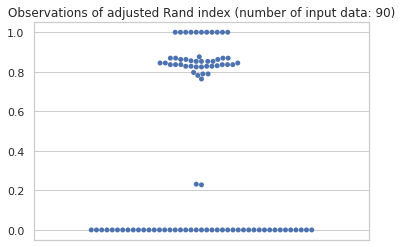

In [5]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(y=rand_scores)
ax.set_title(f'Observations of adjusted Rand index (number of input data: {number_of_times_to_run_clustering})');

The plot above reveals the adjusted Rand index for each generally alternates between either being `0.0` or `~0.8`; however, there even are deviations from this. In fact, in some rare cases the score of `1.0` come up, meaning both algorithms can indeed give the same result with these settings for some randomly produced mock data. 

The DBSCAN algorithm doesn't fare as well here because of the latent data not being as stark as in other notebooks earlier in this series. (Here we used `+ (latent[belongs_to_cluster[i], :]) * 0.2805)` so the divergence of the cluster variables has been minimized by multiplying it be `0.2805`.) For example in the example data included above there is `50 variables in grouping 0` and a `adjusted_rand_score()` of `0.0` because of it. We locked in hierarchichal clustering at specifying three groupings so it won't lump all 50 together.

This touches upon how you have to look at your data and then adjust the threshold setting if you were using hierarchical clustering. Or you may need to adjust the epsilon for DBSCAN, etc., see [here](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc).

You won't get meaningful data out of you just find working code and throw raw, unexamined data at it.

#### Aside to demonstrate how to run different mathods for hierarchical clustering

Before we get to considering the settings further, let's demonstrate how scipy makes it easy to try hierarchical clustering `scipy.cluster.hierarchy.linkage` step with other methods than 'complete', which corresponds to the Farthest Point Algorithm or Voor Hees Algorithm, according to [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html). This is another way we can explore variation in clustering. To do this we'll do much of what we did above but use each of the linkage methods.

In [6]:
%%capture
from collections import defaultdict 
def hcm(df, method):
    '''
    Run single-pass clustering as based on code previously presented in 
    depth in Hierarchical_clustering.ipynb.
    Include a way to set which method to use.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    import scipy
    import scipy.cluster.hierarchy as sch

    X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method=method)
    #ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    k = 3
    ind = sch.fcluster(L, k, criterion='maxclust')
    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))
    print("number of clusters determined:",len(unique))
    for x in np.unique(ind):
        class_members = [xc for xc in ind if xc == x]
        print(f"{len(class_members)} variables in cluster {x}")
    return ind
methods_dict = {"single":"single",
                "complete":"complete",
                "average":"average",
                "weighted":"weighted",
                "centroid":"centroid",
                "median":"median",
                "ward":"ward",
                }
number_of_times_to_run_clustering = 90
rand_scores_by_method = defaultdict(list) 
for i in range(number_of_times_to_run_clustering):
    df_curr = generate_clusters_df()
    for method_to_use in methods_dict:
        ind = hcm(df_curr,method_to_use)
        labels = db(df_curr)
        list_of_hc_assignments_ordered_on_labels.append(ind)
        list_of_db_assignments_ordered_on_labels.append(labels)
        #print(f"The following are the cluster assignments for labels from the DBSCAN result:\n{labels}")
        #print(f"The following are the cluster assignments for labels from the hierarchichal clustering ({other_method_to_use}):\n{ind}")
        from sklearn.metrics.cluster import adjusted_rand_score
        rand_scor= adjusted_rand_score(labels, ind)
        rand_scores_by_method[method_to_use].append(rand_scor)
        print(f"The result with `adjusted_rand_score()` comparing the assignments:\n{rand_scor}")
        print("----------------------------------------------------------")

Show the plots for each method:

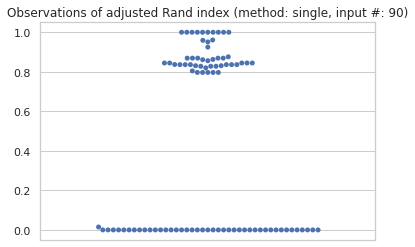

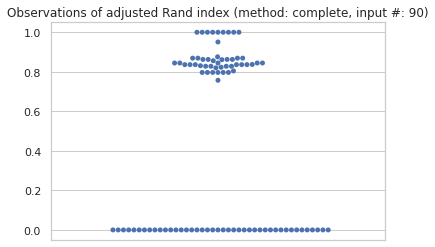

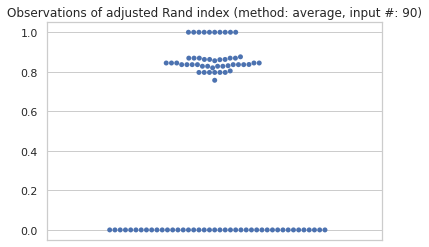

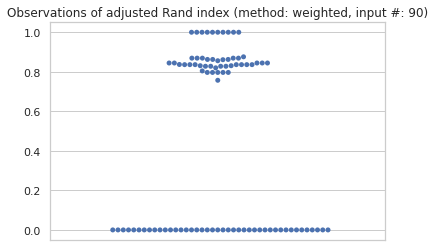

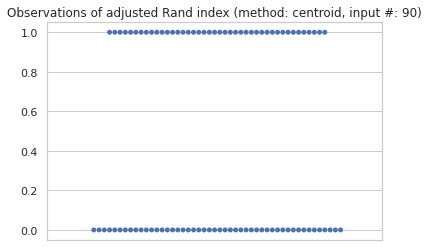

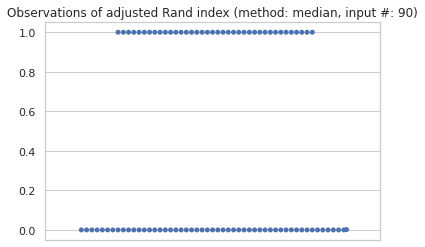

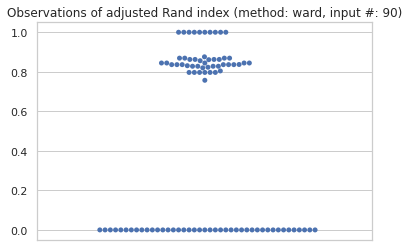

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
for method_to_use in methods_dict:
    ax = sns.swarmplot(y=rand_scores_by_method[method_to_use])
    ax.set_title(f'Observations of adjusted Rand index (method: {method_to_use}, input #: {number_of_times_to_run_clustering})');
    plt.show() # so you show each one and not just last

You'll see variations of about about three or four different patterns of results among the various methods depending on how closely you compare the plots.

### Consider settings to Avoid Apparent Variation between Algorithms 

Let's really illustrate the need to examine the data and not just apply working code by going back to the more stark contrast of artificially generated data used earlier in this series of notebooks, i.e., where the latent data is definef by adding a full `latent[belongs_to_cluster[i], :])` without multiplying it by `0.2805` to lessen its degree difference. With that for the latent data, we'll then re-run both a hierarchichal clustering and DBSCAN algorithm. This time we'll also not specify only three groups for the hierarchichal clustering. We'll run it the first time with the threshold setting for the hierarchical clustering like before and then we'll run `scipy.cluster.hierarchy.fcluster` with a threshold that doesn't match the data as well.

First run the next cell to redefine the functions generating the clusters and running the hierarchichal clustering with the changes:
- the line `variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])`
- the line `ind = sch.fcluster(L, 0.5*d.max(), 'distance')`

In [8]:
def generate_clusters_df():
    '''
    Return a dataframe with the clusters
    '''
    # Generate 50 variables with 1000 samples
    n_variables = 50
    n_samples = 1000

    # Those variables will be spread over 3 clusters of variable sizes
    cluster_size = [5,22,28]
    n_clusters = len(cluster_size)

    # Assign each variable to a cluster
    belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
    np.random.shuffle(belongs_to_cluster)

    # This latent data is used to make variables that belong
    # to the same cluster correlated.
    latent = np.random.randn(n_clusters, n_samples)

    variables = []
    for i in range(n_variables):
        variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])
    return pd.DataFrame(np.array(variables).transpose())
def hc(df):
    '''
    Run single-pass clustering as based on code previously presented in 
    depth in Hierarchical_clustering.ipynb.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    import scipy
    import scipy.cluster.hierarchy as sch

    X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')
    #k = 3
    #ind = sch.fcluster(L, k, criterion='maxclust')
    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))
    print("number of clusters determined:",len(unique))
    for x in np.unique(ind):
        class_members = [xc for xc in ind if xc == x]
        print(f"{len(class_members)} variables in cluster {x}")
    return ind

Now we can run the same code to cycle through using both algorithms on many samples of mock generated data. We suppress the output to keep the output from being long and we'll visualize the results in the cell right after this once the results are generated.

In [9]:
%%capture
number_of_times_to_run_clustering = 90
rand_scores = []
for i in range(number_of_times_to_run_clustering):
    df_curr = generate_clusters_df()
    ind = hc(df_curr)
    labels = db(df_curr)
    list_of_hc_assignments_ordered_on_labels.append(ind)
    list_of_db_assignments_ordered_on_labels.append(labels)
    #print(f"The following are the cluster assignments for labels from the DBSCAN result:\n{labels}")
    #print(f"The following are the cluster assignments for labels from the hierarchichal clustering:\n{ind}")
    from sklearn.metrics.cluster import adjusted_rand_score
    rand_scor= adjusted_rand_score(labels, ind)
    rand_scores.append(rand_scor)
    print(f"The result with `adjusted_rand_score()` comparing the assignments:\n{rand_scor}")
    print("----------------------------------------------------------")
#print (rand_scores)

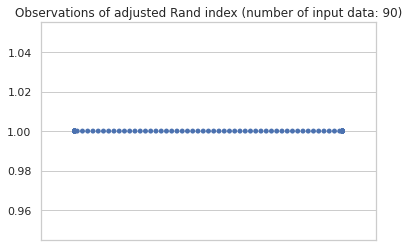

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(y=rand_scores)
ax.set_title(f'Observations of adjusted Rand index (number of input data: {number_of_times_to_run_clustering})');

Aha. This is good. With the well-defined clusters we are getting 100% agreement between the two algorithms. Note that the swarmplot doesn't display all the observations [maybe it would if the width of the plot were wider], but the point is obvious.)

In contrast, let's adjust the threshold setting used for the step in hierarchical clustering where flat clusters are formed from the linkage matrix and see what happens. Instead of `ind = sch.fcluster(L, 0.5*d.max(), 'distance')`, we'll use `ind = sch.fcluster(L, 0.99*d.max(), 'distance')`. The steps will be similar to the example just above where we first redefine the function to have the new settings and step through generating the results and visualizing.

In [11]:
def hc(df):
    '''
    Run single-pass clustering as based on code previously presented in 
    depth in Hierarchical_clustering.ipynb.
    
    Return the list of the cluster assignments corresponding to the labels data.
    '''
    import scipy
    import scipy.cluster.hierarchy as sch

    X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.99*d.max(), 'distance')
    #k = 3
    #ind = sch.fcluster(L, k, criterion='maxclust')
    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))
    print("number of clusters determined:",len(unique))
    for x in np.unique(ind):
        class_members = [xc for xc in ind if xc == x]
        print(f"{len(class_members)} variables in cluster {x}")
    return ind

In [12]:
%%capture
number_of_times_to_run_clustering = 90
rand_scores = []
for i in range(number_of_times_to_run_clustering):
    df_curr = generate_clusters_df()
    ind = hc(df_curr)
    labels = db(df_curr)
    list_of_hc_assignments_ordered_on_labels.append(ind)
    list_of_db_assignments_ordered_on_labels.append(labels)
    #print(f"The following are the cluster assignments for labels from the DBSCAN result:\n{labels}")
    #print(f"The following are the cluster assignments for labels from the hierarchichal clustering:\n{ind}")
    from sklearn.metrics.cluster import adjusted_rand_score
    rand_scor= adjusted_rand_score(labels, ind)
    rand_scores.append(rand_scor)
    print(f"The result with `adjusted_rand_score()` comparing the assignments:\n{rand_scor}")
    print("----------------------------------------------------------")
#print (rand_scores)

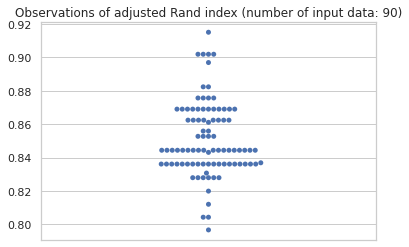

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(y=rand_scores)
ax.set_title(f'Observations of adjusted Rand index (number of input data: {number_of_times_to_run_clustering})');

So with a different and imperfect scalar threshold for `scipy.cluster.hierarchy.fcluster`, we don't agree with DBSCAN perfectly ever. Remember here we know the distance because we defined it. It isn't going to be that easy to perform hierarchical clustering with real data that is typicall rather noisy.

One thing to note is that we aren't doing overly poorly at matching the DBSCAN results; however, we rarely (I never saw one in a few hundred runs) see a perfect match. (We could use the `compare_cluster_membership()` function introduced in the [Comparing clustering notebook](Comparing_clustering.ipynb)if we were curious about the specifics of how the determined clusters differed.) The key point though salient discussing clustering variation is that it is often *NOT* a perfect match between the two algorithmns. This may be more tpyical behavior of real data. And why it is important to understand your data. Maybe density is better at finding the groups in your data. And maybe you don't want to worry about [determining the epsilon value to use](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc), and want to use [HDBSCAN](hdbscan.ipynb). For general background on many of the involved issues, see [Avoiding common pitfalls when clustering biological data](https://stke.sciencemag.org/content/9/432/re6) by Tom Ronan, Zhijie Qi, and Kristen M. Naegle (2016) [here](https://stke.sciencemag.org/content/9/432/re6).